# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


requests.get(eth_url)

<Response [200]>

In [5]:
# Fetch current BTC price
btc_response=requests.get(btc_url).json()
btc_price=btc_response['data']['1']['quotes']['USD']['price']
#btc_price
# Fetch current ETH price
eth_response=requests.get(eth_url).json()
eth_price=eth_response['data']['1027']['quotes']['USD']['price']
#eth_price


# Compute current value of my crpto
# YOUR CODE HERE!


my_btc_value = (btc_price * my_btc)
my_eth_value = (eth_price * my_eth)


#crypto_value = (btc_price * my_btc) + (eth_price * my_eth)
#crypto_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $58024.80
The current value of your 5.3 ETH is $21369.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
api_secret_key = os.getenv("alpaca_secret_key")
# Create the Alpaca API object
# YOUR CODE HERE!
#print (api_key) 
#print (api_secret_key)
alpaca = tradeapi.REST(
    alpaca_api_key,
    api_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-12-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-12-02 00:00:00-05:00  114.67  114.79  114.4001  114.61  7507924  450.72   

                                                              
                             high     low   close     volume  
time                                                          
2021-12-02 00:00:00-05:00  459.07  450.31  457.38  109873511

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.61
Current SPY closing price: $457.38


In [10]:
# Compute the current value of shares
agg_value = agg_close_price * my_agg
spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $22869.00
The current value of your 200 AGG shares is $22922.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income=12000

value_data = {
    "crypto": [my_btc_value + my_eth_value],
    "shares": [spy_value + agg_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data).T

# Display DataFrame data
df_value
# Create savings DataFrame


# Display savings DataFrame
df_value.columns =['Amount']
display(df_value)

,Amount
crypto,79394.559
shares,45791.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

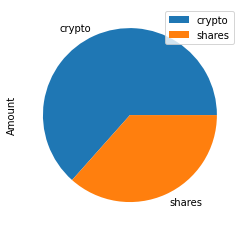

In [12]:
# Plot savings pie chart
df_value.plot(kind='pie',subplots=True)

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
ef=str(emergency_fund)
print(f'{ef}')
# Calculate total amount of savings
#crypto_value=[my_btc_value + my_eth_value]

#shares_value=[spy_value + agg_value]
#tot_savings = 0

#tot_savings = crypto_value + shares_value

#print (tot_savings)
#total_value=df_value.sum(axis=1)
#display (df_value)
# Validate saving health
# YOUR CODE HERE!
#df_value['amount'][0] + df_value['amount'][1]
tot_savings=df_value['Amount'].sum()
if tot_savings>emergency_fund:
    print( 'Congratulations! You have enough money')
elif tot_savings<emergency_fund: 
    print('You need to save more money')
else:
    print('Congratulations! You have enough money')
#if df_value

36000
Congratulations! You have enough money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

tickers = ["SPY", "AGG"]
timeframe = "1D"

start_date = pd.Timestamp('2016-11-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-29', tz='America/New_York').isoformat()

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")




Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [19]:
# Get 5 years' worth of historical data for SPY and AGG

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
    
).df

# Display sample data
df_portfolio.head()
#df_portfolio.head(10)

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-07 00:00:00-05:00  109.44  109.46  109.1536  109.23  2430316.0   
2017-12-08 00:00:00-05:00  109.21  109.29  109.1450  109.19  1533143.0   
2017-12-11 00:00:00-05:00  109.29  109.32  109.1300  109.13  2475019.0   
2017-12-12 00:00:00-05:00  109.07  109.11  108.9500  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.1350  109.41  2638160.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2017-12-07 00:00:00-05:00     NaN     NaN      NaN     NaN         NaN  
2017-12-08 00:00:00-05:00  265.01  265.52  264.720  265.49  41139547.0  
2017-12-11 00:00:00-05:00  265.57  266.38  265.490  266.34  38104278.0  
2017-12-12 00:00:00-05:00  266.59  267.32  266.345  266.79  46482549.0  
2017-12-13 00:00:00-05:00  267.06  267.56  266.650  266.73  48961663.0

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

#I'm doing one year here

MC_oneyear=MCSimulation(
    df_portfolio,
    weights= [.4,.6],
    num_simulation=100,
    num_trading_days=252,
)

MC_oneyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006431,1.003442,0.991595,1.003371,0.997248,0.998499,0.993271,1.001180,0.998103,1.002461,...,0.988379,1.004842,1.001235,0.979441,1.003763,1.002164,1.001956,0.984495,1.006196,1.003010
2,1.004438,1.004405,0.989397,1.011397,0.982632,0.998686,1.005554,0.996997,0.998882,0.993216,...,0.997377,1.000615,0.987719,0.985563,1.009034,0.997888,1.007447,0.992177,1.011958,0.988332
3,1.004665,1.000392,1.003117,1.009533,0.986640,1.000009,1.007605,0.985576,1.006145,0.983325,...,1.002228,1.011017,0.993578,0.984554,1.007989,1.008997,0.995525,0.980761,1.004241,0.976340
4,1.001101,0.997532,1.005230,1.012868,0.997023,0.993578,1.003467,0.989582,1.032038,0.983433,...,1.007743,1.008464,0.988232,0.983183,1.002781,1.008840,0.994213,0.973915,1.006819,0.963575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.145592,1.054440,1.083570,1.085134,0.941967,0.931330,1.142736,1.177008,0.891623,1.357372,...,1.151785,0.883558,1.156406,1.265298,0.981358,1.281746,1.266700,0.947768,1.144960,1.344937
249,1.148663,1.045116,1.096164,1.079025,0.926567,0.938577,1.137404,1.174377,0.891516,1.359454,...,1.150401,0.896245,1.152920,1.271608,0.980091,1.283969,1.282486,0.946064,1.138737,1.347362
250,1.146388,1.038756,1.093878,1.074277,0.924157,0.919936,1.134992,1.169821,0.894818,1.362692,...,1.143628,0.883929,1.154130,1.285457,0.980889,1.280996,1.281319,0.948460,1.132713,1.353902
251,1.141862,1.034922,1.089912,1.085378,0.922931,0.925560,1.136794,1.163491,0.900341,1.347652,...,1.132383,0.883178,1.156033,1.291796,0.987545,1.277927,1.272227,0.949873,1.136067,1.357147


In [25]:
# Printing the simulation input data
MC_oneyear.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-07 00:00:00-05:00  109.44  109.46  109.1536  109.23  2430316.0   
2017-12-08 00:00:00-05:00  109.21  109.29  109.1450  109.19  1533143.0   
2017-12-11 00:00:00-05:00  109.29  109.32  109.1300  109.13  2475019.0   
2017-12-12 00:00:00-05:00  109.07  109.11  108.9500  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.1350  109.41  2638160.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-07 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2017-12-08 00:00:00-05:00    -0.000366  265.01  265.52  264.720  265.49   
2017-12-11 00:00:00-05:00    -0.000550  265.57  266.38  265.490  266.34   
2017-12-12 00:00:00-05:00    -0.000275  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   

                                                    
                               volume daily_return  
time                                                
2017-12-07 00:00:00-05:00         NaN          NaN  
2017-12-08 00:00:00-05:00  41139547.0          NaN  
2017-12-11 00:00:00-05:00  38104278.0     0.003202  
2017-12-12 00:00:00-05:00  46482549.0     0.001690  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year=MCSimulation(
    df_portfolio,
    weights= [.4,.6],
    num_simulation=500,
    num_trading_days=252*30,
)

MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\josh\Documents\fintech_homework\API HW\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011868,0.994366,1.013069,1.014000,1.003774,0.986152,0.988917,0.994918,0.997553,1.008822,...,0.995078,1.004139,1.017464,1.005724,1.007664,0.988897,0.995466,1.005718,0.995931,0.985705
2,1.017263,0.982963,1.002997,1.003634,0.998529,0.985421,0.996584,0.997712,0.997132,1.015183,...,0.993142,0.998177,1.024655,1.004642,1.016802,0.986194,0.982400,1.003117,0.992734,0.991421
3,1.022287,0.985874,0.995779,1.014245,0.987929,0.978722,0.990802,0.990801,0.996869,1.015480,...,0.998800,0.987608,1.029900,1.006535,1.017646,1.000702,0.967073,0.999905,0.988788,0.997137
4,1.021201,0.982179,0.999964,1.020128,1.004030,0.983663,1.002368,0.991376,0.991649,1.003128,...,1.012789,0.973047,1.024268,1.013329,1.027719,1.012738,0.964498,1.013271,0.978456,1.002344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.573602,30.637938,10.434201,9.053296,13.769946,5.616641,18.324397,20.655124,30.332708,10.533942,...,19.936678,45.943499,18.199318,8.076516,16.007398,43.073094,6.880536,82.731738,22.305034,14.060116
7557,20.697414,30.372944,10.362030,9.126451,13.782443,5.656260,18.455160,20.608544,29.811702,10.351039,...,20.129651,45.525421,18.282817,8.071161,15.945637,43.283169,6.886780,82.765266,22.472100,14.055443
7558,20.991092,30.357949,10.300783,9.106375,13.691097,5.623781,18.430276,20.769048,29.880089,10.443847,...,20.566494,44.960639,18.283791,7.988199,16.014916,43.625427,6.905605,84.204358,22.285833,14.276248
7559,21.309972,30.341609,10.348772,9.107088,13.611427,5.572434,18.626549,20.843221,29.999623,10.568918,...,20.721605,45.134673,18.141635,7.890043,15.916460,42.952780,6.973139,84.432814,22.002737,14.267950


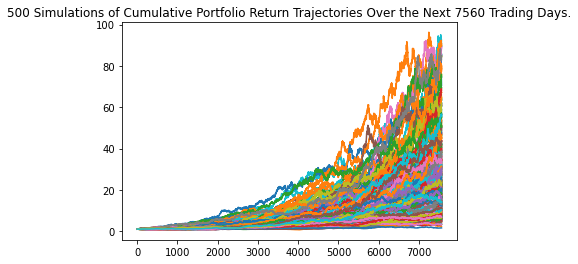

In [28]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

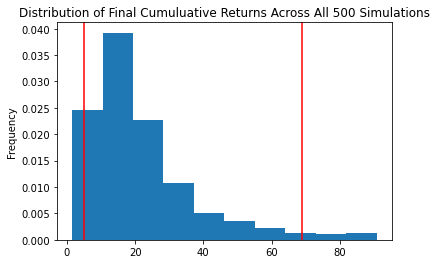

In [29]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()

### Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results

MC_30year.summarize_cumulative_return()

# Print summary statistics



count           500.000000
mean             21.895987
std              16.082985
min               1.549317
25%              11.109284
50%              17.310942
75%              27.417368
max              90.744209
95% CI Lower      5.156607
95% CI Upper     68.868144
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

tbl = MC_30year.summarize_cumulative_return()
ci_lower= round(tbl[8]*20000,2)
ci_upper= round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $103132.15 and $1377362.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower= round(tbl[8]*20000*1.5,2)
ci_upper= round(tbl[9]*20000*1.5,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $154698.22 and $2066044.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")